## Assignment Number : 1
### Name : MOHIT SHARMA
### Roll Number : 2022201060

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import sys
import numpy as np

# Q1: Own Calibration:

## 1. For the given image `calib-object.jpg`, identify the chessboard internal corners. You may use external libraries to detect the chessboard corners. Note, each square of the chess board is 2cm × 2cm.

In [2]:
img = cv.imread('calib-object.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
max_corners = 140
quality = 0.275
Ecl_dist = 130
corners = cv.goodFeaturesToTrack(gray, max_corners, quality ,Ecl_dist)
corners = np.int0(corners)
print(corners.shape)
#print(corners)

(120, 1, 2)


/var/folders/yr/8m9sl3p956dbjdrvff1t9yh00000gn/T/ipykernel_25205/3208877232.py:7: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [3]:
# show corners in image 
def show_corners(img , corners, shiftx = 25, shifty = - 25,bold = 3,R = 100,G = 155,B = 100,font_size = 0.7):
#     print(img)
#     print(corners)
    plt.figure(figsize=(12, 15))  
    for index, corner in enumerate(corners):
        point = (corner.ravel())
#         print(point)
        cv.circle(img, point, 10, (0, 255, 0), -1)  
        cv.putText(img, f'{index}: {point}', (point[0] + shiftx, point[1] + shifty), cv.FONT_HERSHEY_SIMPLEX, font_size, (R, G, B), bold, cv.LINE_AA)
    
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

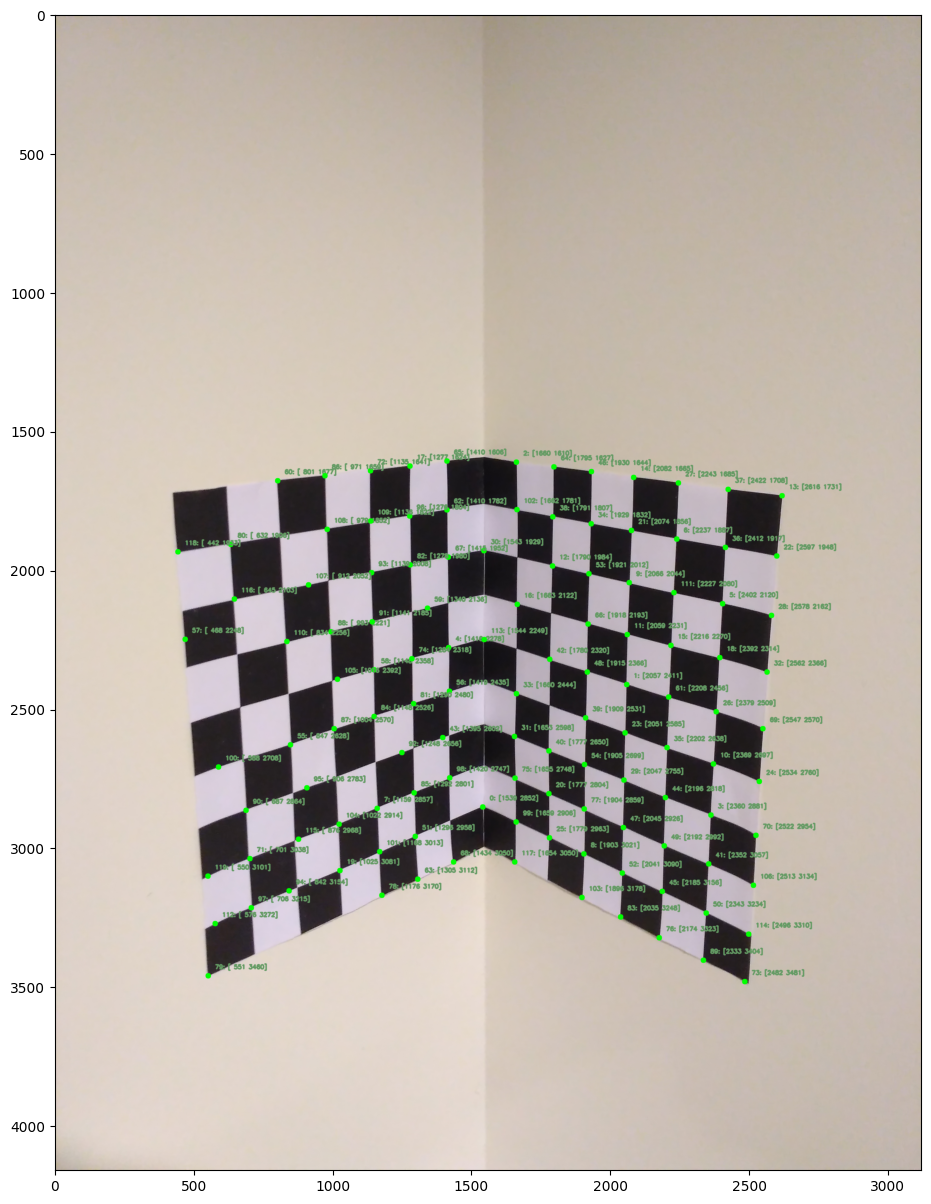

In [4]:
show_corners(img , corners)

## 2.  Implement the camera calibration process discussed in the lecture. 

##### Assume a world origin, create a set of corresponding points in the world coordinate and image plane, 

In [5]:

pixel_coordinates = np.array([corners[13][0],corners[73][0],corners[0][0], corners[99][0],corners[79][0], corners[81][0], corners[108][0], corners[55][0],corners[34][0], corners[18][0]])
world_coordinates = np.array([[14,0,0],[14,18,0],[0,16,0],[2, 16, 0],[0,18,14], [0, 10, 4], [0, 2, 8], [0, 10, 10],[6, 2, 0], [12, 6, 0]])

for idx, (world_coord, pixel_coord) in enumerate(zip(world_coordinates, pixel_coordinates)):
    print(f"World Coordinate {idx + 1}: ({world_coord[0]}, {world_coord[1]}, {world_coord[2]}) -> Pixel Coordinate: ({pixel_coord[0]}, {pixel_coord[1]})")


World Coordinate 1: (14, 0, 0) -> Pixel Coordinate: (2616, 1731)
World Coordinate 2: (14, 18, 0) -> Pixel Coordinate: (2482, 3481)
World Coordinate 3: (0, 16, 0) -> Pixel Coordinate: (1539, 2852)
World Coordinate 4: (2, 16, 0) -> Pixel Coordinate: (1659, 2906)
World Coordinate 5: (0, 18, 14) -> Pixel Coordinate: (551, 3460)
World Coordinate 6: (0, 10, 4) -> Pixel Coordinate: (1290, 2480)
World Coordinate 7: (0, 2, 8) -> Pixel Coordinate: (979, 1852)
World Coordinate 8: (0, 10, 10) -> Pixel Coordinate: (847, 2628)
World Coordinate 9: (6, 2, 0) -> Pixel Coordinate: (1929, 1832)
World Coordinate 10: (12, 6, 0) -> Pixel Coordinate: (2392, 2314)


#### Compute both extrinsics (translation vector, rotation matrix) and intrinsics (assume no skew) without using any external libraries for the calib-object.jpg image.

In [6]:
def print_calibration_results(camera_matrix, rotation_matrix, translation_vector, projection_matrix):
    
    print("Camera Calibration Results:")
    print("============================\n")

    print("Camera Matrix (Intrinsic Matrix):")
    print("----------------------------------")
    print(camera_matrix)

    print("\nRotation Matrix:")
    print("-----------------")
    print(rotation_matrix)

    print("\nTranslation Vector:")
    print("--------------------")
    print(translation_vector)

    print("\nProjection Matrix (Camera Calibration Matrix):")
    print("-----------------------------------------------")
    print(projection_matrix)

def dlt_method(world_coordinates, image_coordinates):
    n = len(world_coordinates)
    Amatrix = np.zeros((2 * n, 12))

    for i in range(n):
        X, Y, Z = world_coordinates[i]
        u, v = image_coordinates[i]
        Amatrix[2 * i] = [X, Y, Z, 1, 0, 0, 0, 0, -u * X, -u * Y, -u * Z, -u]
        Amatrix[2 * i + 1] = [0, 0, 0, 0, X, Y, Z, 1, -v * X, -v * Y, -v * Z, -v]
        
    _, _, V = np.linalg.svd(Amatrix)
    Projection_matrix = V[-1].reshape(3, 4)
    return Projection_matrix

def extract_parameters(projection_matrix):
    
    # Extract intrinsic matrix K and translation vector C from the projection matrix
    K_R = projection_matrix[:, 0:3]
    K_R_C = projection_matrix[:, 3]

    # Perform QR decomposition of the inverse of KR to obtain rotation matrix Q and upper triangular matrix R
    Q, R = np.linalg.qr(np.linalg.inv(K_R))
    
    # Extract rotation matrix vector T
    rotation_matrix = Q.T
    # Extract translation vector T
    translation_vector = -np.dot(np.linalg.inv(K_R), K_R_C)
    
    # Intrinsic matrix is the inverse of R normalized such that K[2, 2] = 1
    intrinsic_matrix = np.linalg.inv(R)
    intrinsic_matrix /= intrinsic_matrix[2, 2]
   
    # Ensuring correct scaling of K
    if intrinsic_matrix[0, 0] > 0:
        intrinsic_matrix *= -1
        
    return intrinsic_matrix, rotation_matrix, translation_vector


In [7]:
# Compute projection matrix using Direct Linear Transformation (DLT) method
projection_matrix = dlt_method(world_coordinates, pixel_coordinates)

# Extract intrinsic matrix (camera matrix), rotation matrix, and translation vector from projection matrix
camera_matrix, rotation_matrix, translation_vector = extract_parameters(projection_matrix)

#print output....
print_calibration_results(camera_matrix, rotation_matrix, translation_vector, projection_matrix)

Camera Calibration Results:

Camera Matrix (Intrinsic Matrix):
----------------------------------
[[-3.71575865e+03  1.21351510e+01 -1.58690658e+03]
 [-0.00000000e+00 -3.71338869e+03 -2.06271827e+03]
 [-0.00000000e+00 -0.00000000e+00 -1.00000000e+00]]

Rotation Matrix:
-----------------
[[-0.69590236  0.00151828  0.7181348 ]
 [-0.17963868 -0.9685741  -0.17202955]
 [ 0.69530558 -0.24872056  0.67430574]]

Translation Vector:
--------------------
[31.32275847 -5.40263945 29.64804762]

Projection Matrix (Camera Calibration Matrix):
-----------------------------------------------
[[-1.54638044e-02 -3.94159500e-03  3.90769944e-02 -6.95482596e-01]
 [ 8.01429167e-03 -4.29336377e-02  7.85695098e-03 -7.15927944e-01]
 [ 7.26373250e-06 -2.59833902e-06  7.04435100e-06 -4.50409281e-04]]


## 3. Use the real-world measurements along with the estimated camera parameters to compute the image of a wireframe of the object (Hint: the wireframe is the outer corners of the actual chessboard pattern and has 6 points). Note that you should compute the location of image points as xi = PXi, where P is the projection matrix computed above. 

In [8]:
def compute_pixel_coordinate(projection_matrix, world_coordinate):
    # make it homogeneous
    world_coordinate = np.append(world_coordinate, 1)
    
    homogeneous_pixel_coordinate = np.dot(projection_matrix, world_coordinate)
    u = homogeneous_pixel_coordinate[0] / homogeneous_pixel_coordinate[2]
    v = homogeneous_pixel_coordinate[1] / homogeneous_pixel_coordinate[2]
    
    return u, v

def get_pixel_coordinates(projection_matrix, world_coordinates):
    pixel_coordinates =[]
    for world_co in world_coordinates:
        pixel_co = compute_pixel_coordinate(projection_matrix, world_co)
        pixel_coordinates.append(pixel_co)

    pixel_coordinates = np.array(pixel_coordinates)
    return pixel_coordinates

In [9]:
wireframes_world_coordinates = np.array([[0,0,0],[14,0,0],[14,18,0],[0,18,0],[0,18,14],[0,0,14]])
wireframes_pixel_coordinates = get_pixel_coordinates(projection_matrix, wireframes_world_coordinates)
print(wireframes_pixel_coordinates)

[[1544.11248879 1589.50530797]
 [2615.23180392 1731.28300135]
 [2485.3515991  3480.60211893]
 [1541.55890494 2994.35871756]
 [ 550.36688914 3459.30700985]
 [ 421.85782403 1722.42940938]]


### Overlay (draw) the wireframe over the actual image of the object using straight lines between the computed points xi.

In [10]:

def visualize_wireframe(image_path, pixel_coordinates, line_indices, circle_radius=15, circle_color=(0, 255, 0), text_color=(100, 20, 255), line_color=(50, 255, 50), line_thickness=5):
    # Load the image
    image = cv.imread(image_path)
    plt.figure(figsize=(16, 16)) 
    
    for start_idx, end_idx in line_indices:
        start_point = tuple(map(int, pixel_coordinates[start_idx]))
        end_point = tuple(map(int, pixel_coordinates[end_idx]))
        cv.line(image, start_point, end_point, line_color, line_thickness)  
    
    for idx, point in enumerate(pixel_coordinates):
        x, y = map(int, point)
        cv.circle(image, (x, y), circle_radius, circle_color, -1)  
        cv.putText(image, f'{idx}: ({x}, {y})', (x + 5, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.7, text_color, 2, cv.LINE_AA)
 
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show()


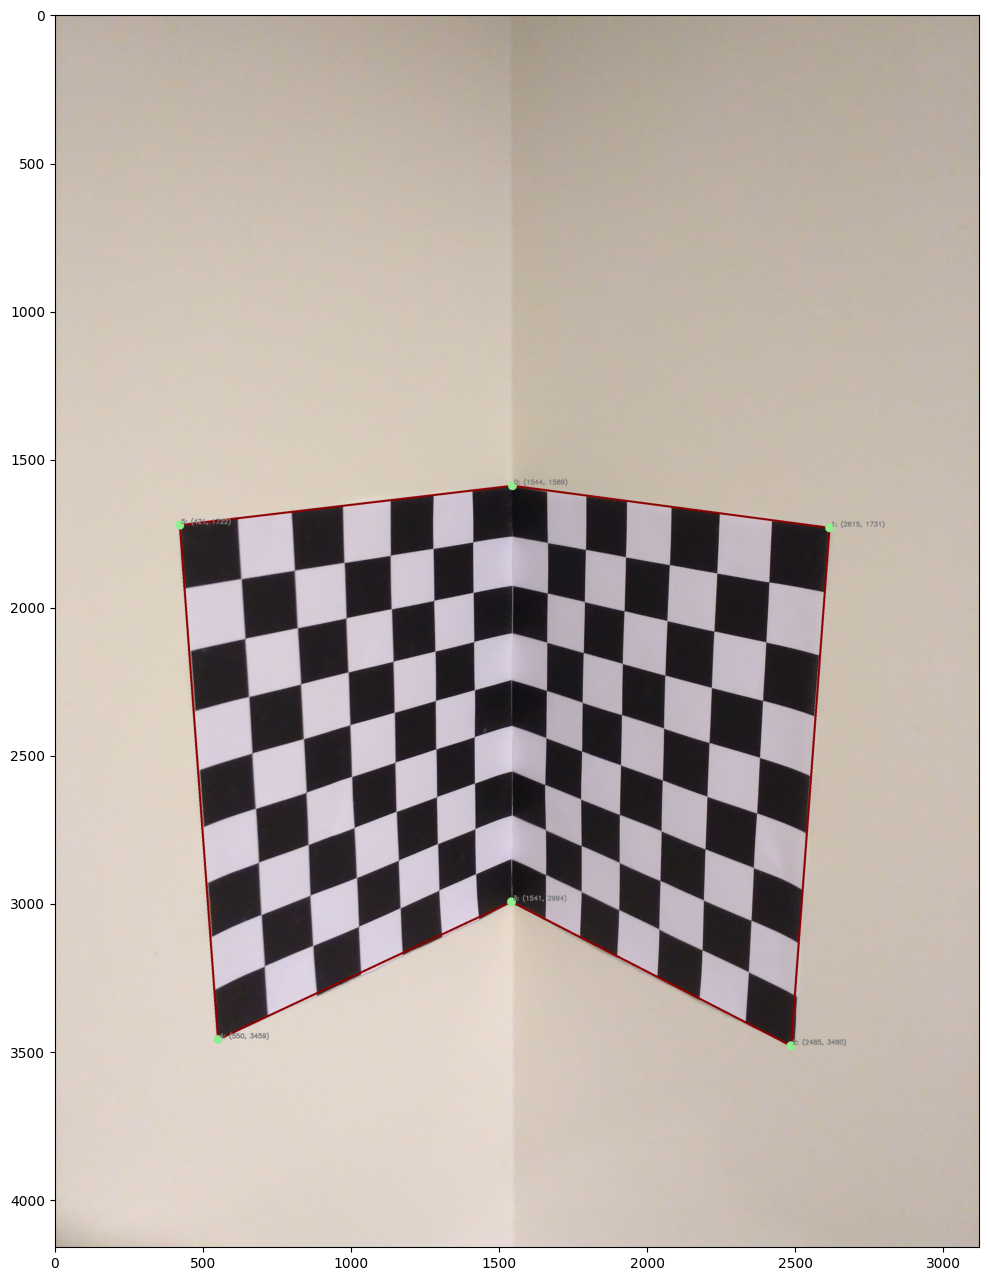

In [11]:
   
img_path = 'calib-object.jpg'
line_indices = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0)]
visualize_wireframe(img_path, wireframes_pixel_coordinates, line_indices, circle_color=(144, 238, 144), text_color=(128, 128, 128), line_color=(0, 0, 139))

 ### --> What do you observe about the overlay?

The wireframe overlay shows perfect alignment with the world coordinate of chessboard for three outer lines. This indicates that the computed points closely match the chessboard in the image, suggesting accurate calibration and wireframe generation.

While not perfect, the alignment of the wireframe overlay with the world coordinate of chessboard is very close for the remaining three lines. There are `slight discrepancies`, but they are minor and do not significantly impact the overall alignment between the wireframe and the object.

Throughout the wireframe overlay, consistent distortion is observed, particularly towards the edges of the image. This distortion results in slight deviations or curvatures in the wireframe lines compared to the actual chessboard.

## 4.   Given the rotation matrix, compute the three rotation angles. 

In [12]:
def rotation_matrix_to_euler_angles(rotation_matrix):
    pitch = np.arctan2(-rotation_matrix[2, 0], np.sqrt(rotation_matrix[0, 0] ** 2 + rotation_matrix[1, 0] ** 2))
    roll = np.arctan2(rotation_matrix[2, 1], rotation_matrix[2, 2])
    pan = np.arctan2(rotation_matrix[1, 0], rotation_matrix[0, 0])
    return pitch, roll, pan

In [13]:
pitch, roll, pan = rotation_matrix_to_euler_angles(rotation_matrix)
pitch = np.degrees(pitch)
roll = np.degrees(roll)
pan = np.degrees(pan)

In [14]:
print("Pitch :", pitch , "Deg")
print("Roll :", roll , "Deg")
print("Pan :", pan , "Deg")

Pitch : -44.05157282779039 Deg
Roll : -20.246711959690675 Deg
Pan : -165.52577136324047 Deg


## Explain the values that you obtain in terms of pan, tilt, and roll?
### Explaination :

- **Pitch**: Pitch refers to the up-down movement or tilt of the object or camera. In this case, the pitch is approximately ``-44.05 degrees``, indicating a slight tilt upwards which nearby observed.
  
- **Roll**: This describes the side-to-side rotation of the object or camera. here, the roll is approximately ``-20.25 degrees``, suggesting a slight counter-clockwise rotation which expected.
  
- **pan**: This describing the left-right movement of the object or camera. In your case, the pan is approximately ``-165.53 degrees``, indicating a significant counter-clockwise rotation or leftward movement.


# Q2: OpenCV Calibration

## 1.  Now repeat the camera calibration process for calib-object.jpg using OpenCV calibration func- tions, continue to assume that there is no skew or distortion (Hint: see calibrateCamera() FLAGS). 

In [15]:
pixel_coordinates = np.array([corners[16][0], corners[18][0],corners[111][0], corners[99][0],corners[34][0],corners[21][0],corners[52][0],corners[40][0]], dtype=np.float32)
world_coordinates = np.array([[2,6,0], [12, 6, 0],[10,4,0], [2, 16, 0],[6, 2, 0],[8,2,0],[8,16,0],[4,12,0]],dtype=np.float32)

height, width = gray.shape[:2]
imageSize = (width, height)
retval, camera_matrix, dist_coeffs, rvecs, tvecs = cv.calibrateCamera([world_coordinates], [pixel_coordinates], imageSize, None, None)

R, _ = cv.Rodrigues(rvecs[0])
opencv_projection_matrix = np.dot(camera_matrix, np.hstack((R, tvecs[0])))


In [16]:

# Print reprojection error
print(f"\nReprojection error (retval): {retval}")

# Print camera matrix
print("\nCamera matrix:")
print(camera_matrix)

# Print distortion coefficients
print("\nDistortion coefficients:")
print(dist_coeffs)

# Print rotation vectors
print("\nAll rvecs:")
for idx, rvec in enumerate(rvecs):
    print(f"Rotation vector {idx + 1}:")
    print(rvec)

# Print translation vectors
print("\nAll tvecs:")
for idx, tvec in enumerate(tvecs):
    print(f"Translation vector {idx + 1}:")
    print(tvec)

    
print("\nProjection Matrix:")
print(opencv_projection_matrix)


Reprojection error (retval): 0.874350689478506

Camera matrix:
[[4.06373791e+03 0.00000000e+00 1.44964037e+03]
 [0.00000000e+00 4.07555787e+03 2.15273606e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion coefficients:
[[-2.22985594e+00  5.75717629e+01  1.08626420e-02  6.05427920e-02
  -4.43473669e+02]]

All rvecs:
Rotation vector 1:
[[0.24285269]
 [0.84568571]
 [0.10830604]]

All tvecs:
Translation vector 1:
[[ 1.1400378]
 [-6.5372757]
 [47.0747299]]

Projection Matrix:
[[ 1.62726519e+03  3.75842136e+02  3.97821238e+03  7.28742435e+04]
 [-7.87139081e+02  4.48992342e+03  6.82234746e+02  7.46964232e+04]
 [-7.26876026e-01  2.55144821e-01  6.37614588e-01  4.70747299e+01]]


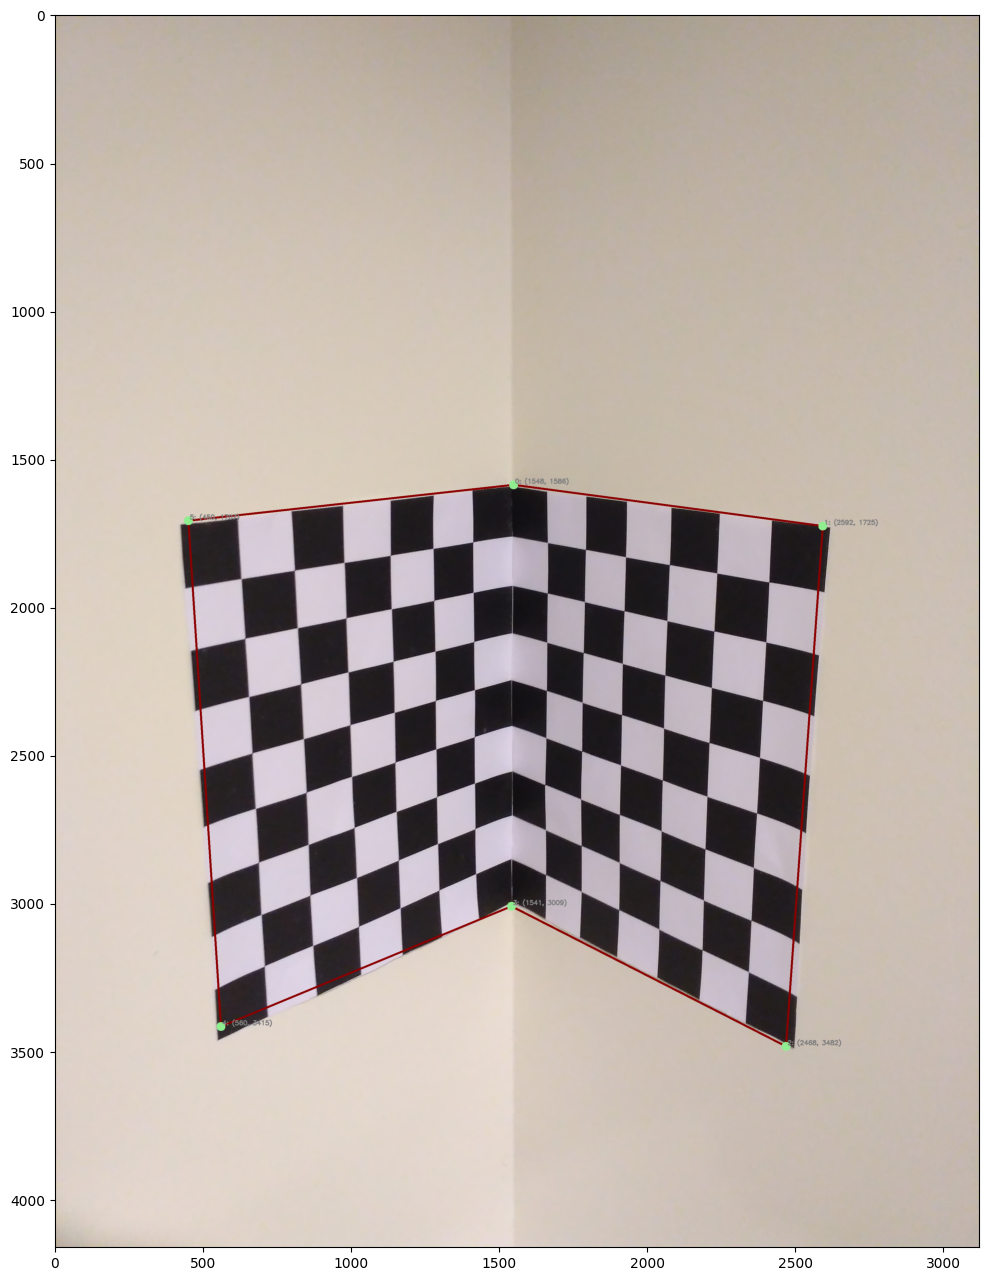

In [17]:
opencv_wireframes_world_coordinates = np.array([[0,0,0],[14,0,0],[14,18,0],[0,18,0],[0,18,-14],[0,0,-14]])
opencv_wireframes_pixel_coordinates = get_pixel_coordinates(opencv_projection_matrix, opencv_wireframes_world_coordinates)

# visualize wireframe
visualize_wireframe(img_path, opencv_wireframes_pixel_coordinates, line_indices,circle_color=(144, 238, 144), text_color=(128, 128, 128), line_color=(0, 0, 139))

### Q. - > How does your result compare with Q1 above? Repeat the overlay of the wireframe using the new parameters. Describe your observations.

When comparing the results obtained from the opencv's calibrateCamera() with those from the own calibration process described observations are :

   - In opencv's calibrateCamera() results, there are some differences in the alignment between the wireframe overlay and the chessboard object in the image compared to the previous results.
   
   - After repeating the overlay of the wireframe using the opencv's calibrateCamera() parameters, we can observe that more lines of the wireframe do not perfectly align with the object compared to the previous calibration also we can see little distortion of points in the image. 

   - The opencv's calibrateCamera() parameters results in a slightly different projection matrix, affecting the accuracy of the wireframe overlay. This may be leading to discrepancies between the wireframe and the chessboard in the image.
   
   - While both calibration processes aim to accurately map the 3D world coordinates to 2D image coordinates, variations in the calibration parameters may result in differences in the alignment and accuracy of the wireframe overlay.


## 2.  Repeat Q2.1, for the second image assign1.jpg. 

/var/folders/yr/8m9sl3p956dbjdrvff1t9yh00000gn/T/ipykernel_25205/308224269.py:21: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


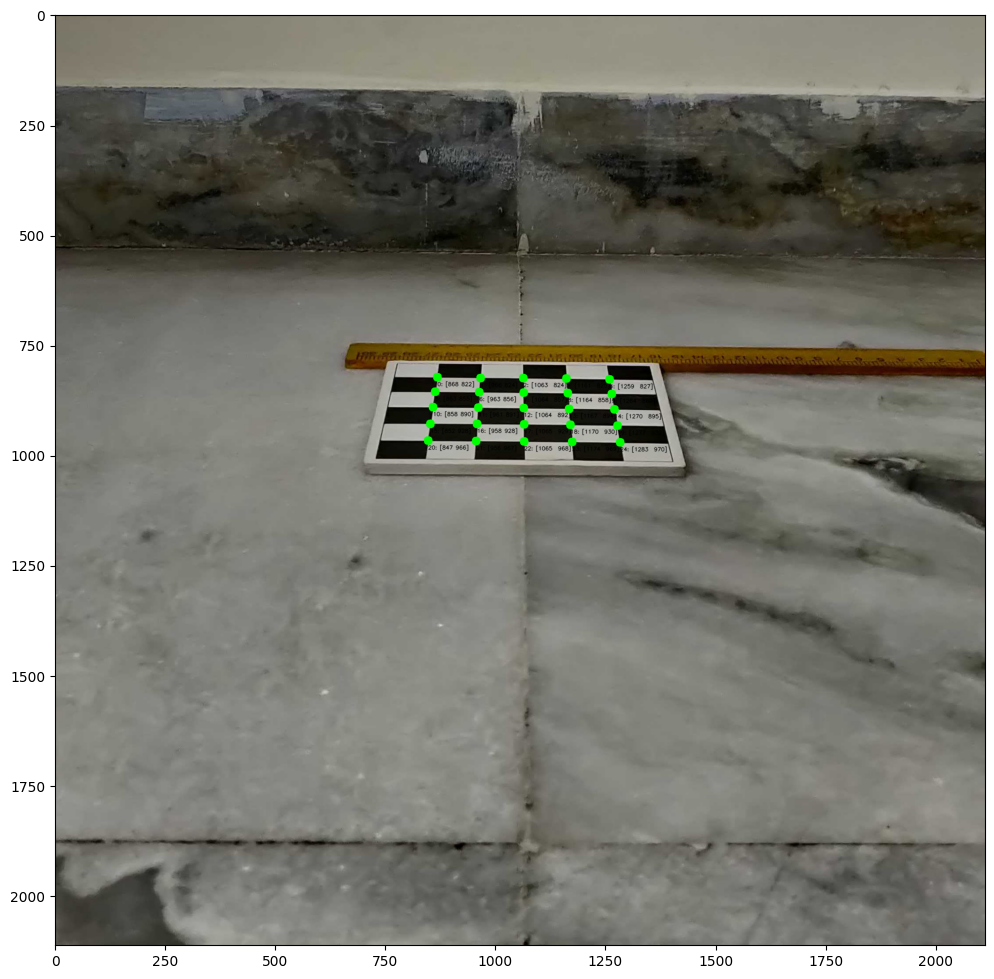

In [18]:
objp = np.zeros((5*5, 3), np.float32)
grid_size = 5  # Grid size for x and y coordinates

for i in range(1, grid_size + 1):
    for j in range(1, grid_size + 1):
        objp[(i - 1) * grid_size + (j - 1)] = [i*2, j*2, 0]

objpoints = [] 
imgpoints = [] 
img_new_name  = "assign1.jpg"

img = cv.imread(img_new_name)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
retVal, corners = cv.findChessboardCorners(gray, (5,5), None)

if retVal == True:
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
    imgpoints.append(corners2)
    corners = np.int0(corners)
    show_corners(img , corners, shiftx = 0, shifty = 20,bold = 1,R = 0,G = 0,B = 0,font_size = 0.4)
    

In [19]:
objpoints = np.array(objpoints,dtype=np.float32)
imgpoints = np.array(imgpoints, dtype=np.float32)
new_imageSize = gray.shape[::-1]
imgpoints = imgpoints.reshape((1, 25, 2))
new_retval, new_camera_matrix, new_dist_coeffs, new_rvecs, new_tvecs = cv.calibrateCamera(objpoints, imgpoints, new_imageSize, None, None)
new_R, _ = cv.Rodrigues(new_rvecs[0])
new_projection_matrix = np.dot(new_camera_matrix, np.hstack((new_R, new_tvecs[0])))


In [20]:
# Print the shapes of objpoints and imgpoints
print("Object points shape:", objpoints.shape)
print("\n Image points shape:", imgpoints.shape)

# Print the lengths of objpoints and imgpoints
print("\n Number of object points:", len(objpoints[0]))
print("\n Number of image points:", len(imgpoints[0]))


# Print projection matrix
print("\n Projection Matrix:\n", new_projection_matrix)

# Print corresponding object and image points
print("\n Corresponding object and image points:")
for obj_point, img_point in zip(objpoints[0], imgpoints[0]):
    print(f"Object point: {obj_point} --> Image point: {img_point}")

# Print reprojection error
print("\n Reprojection error (retval):", new_retval)

# Print camera matrix and distortion coefficients
print("\n Camera matrix:\n", new_camera_matrix)
print("\n Distortion coefficients:\n", new_dist_coeffs)

# Print rotation and translation vectors
print("\n All rvecs: \n", new_rvecs)
print("\n All tvecs: \n", new_tvecs)



Object points shape: (1, 25, 3)

 Image points shape: (1, 25, 2)

 Number of object points: 25

 Number of image points: 25

 Projection Matrix:
 [[-7.98403522e+02  3.06173237e+03 -6.06260409e+02  4.86456344e+04]
 [ 3.80510866e+02  6.25606148e+01 -2.04808316e+03  4.94822977e+04]
 [-7.63995447e-01  3.08869002e-02 -6.44481928e-01  6.28604905e+01]]

 Corresponding object and image points:
Object point: [2. 2. 0.] --> Image point: [868.2322  822.77496]
Object point: [2. 4. 0.] --> Image point: [966.1994 824.0821]
Object point: [2. 6. 0.] --> Image point: [1063.7356   824.84314]
Object point: [2. 8. 0.] --> Image point: [1161.6423  825.9716]
Object point: [ 2. 10.  0.] --> Image point: [1259.3159   827.24994]
Object point: [4. 2. 0.] --> Image point: [863.2515  855.72894]
Object point: [4. 4. 0.] --> Image point: [963.7172 856.5492]
Object point: [4. 6. 0.] --> Image point: [1064.2511  857.5893]
Object point: [4. 8. 0.] --> Image point: [1164.6083   858.77344]
Object point: [ 4. 10.  0.] --

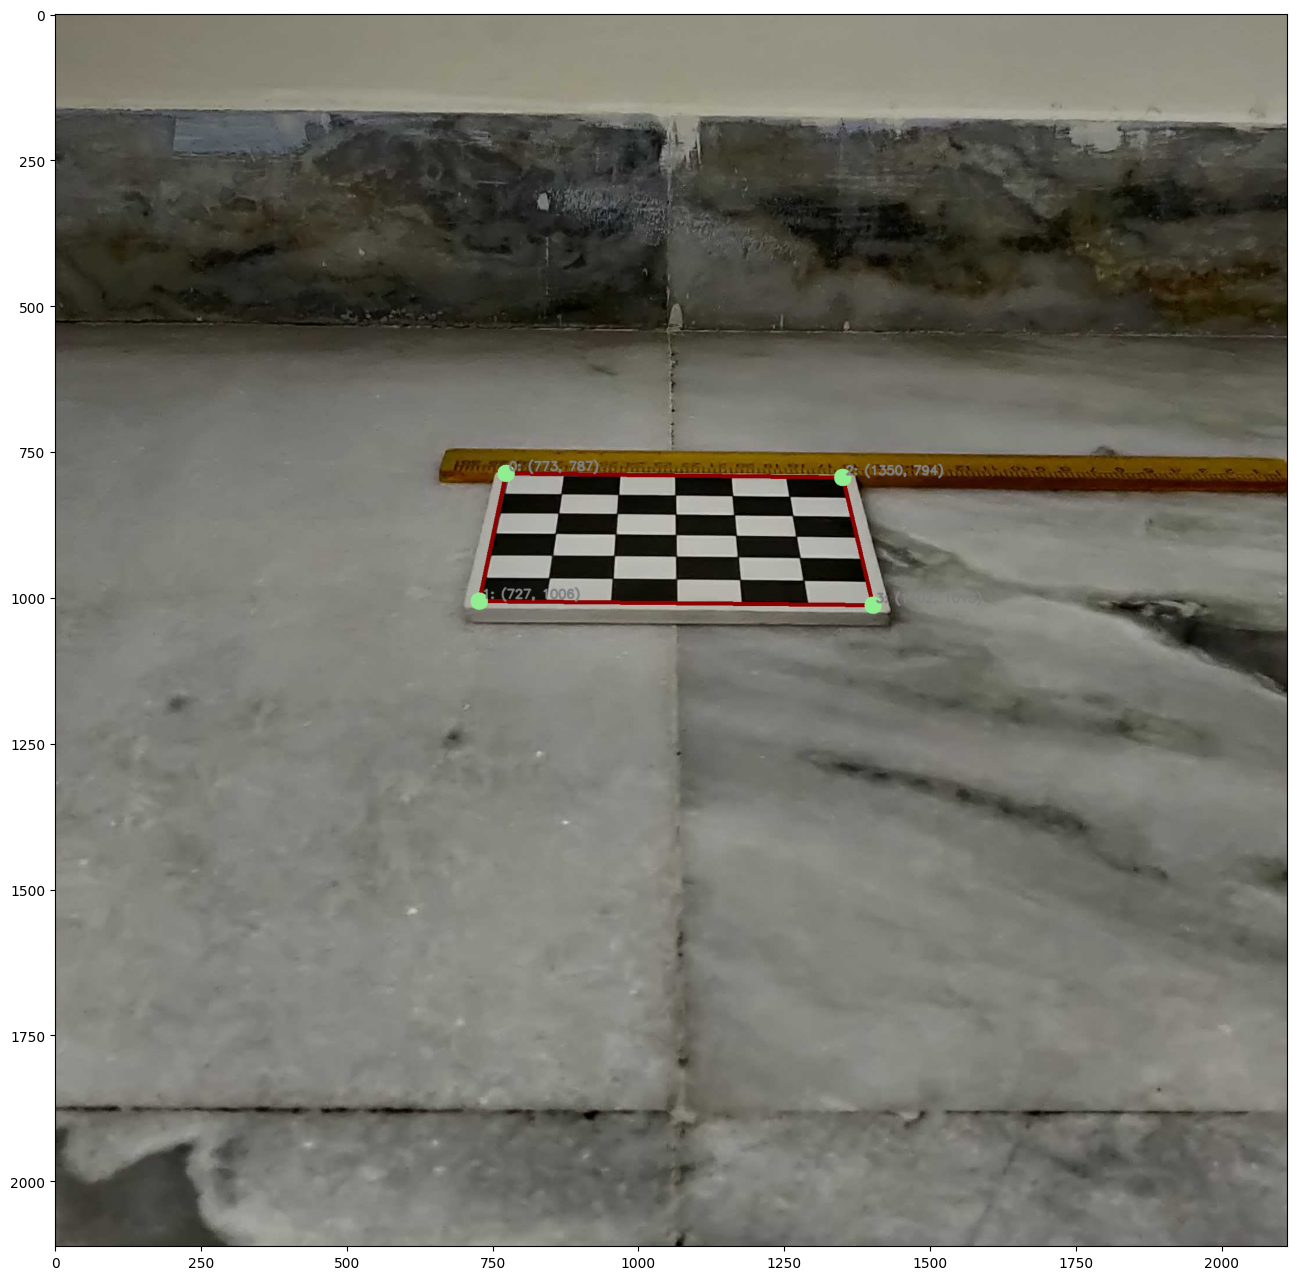

In [21]:
new_wireframes_world_coordinates = np.array([[0,0,0],[12,0,0],[0,12,0],[12,12,0]])
new_line_indices = [(0, 2), (2, 3), (3, 1), (1, 0)]
new_wireframes_pixel_coordinates = get_pixel_coordinates(new_projection_matrix, new_wireframes_world_coordinates)

# visualize wireframe
visualize_wireframe(img_new_name, new_wireframes_pixel_coordinates, new_line_indices,circle_color=(144, 238, 144), text_color=(128, 128, 128), line_color=(0, 0, 139))

### Q. Does the wireframe overlay show significant distor- tions? Comment. What can we say about the computed projection matrix when trying to do calibration based on world coordinate points that are co-planar? (Hint: we looked at co-planar points in two-view geometry).

- In this case, when using the `cv2.calibrateCamera()` function on a different image containing a planar chessboard of size 6x6, the wireframe overlay shows no significant distortions. This suggests that the calibration process based on world coordinate points that are co-planar (such as the corners of a planar chessboard) can yield accurate results without introducing significant distortions in the wireframe overlay.

- Regarding the computed projection matrix, when calibrating based on world coordinate points that are co-planar, the resulting projection matrix is expected to accurately map the 3D world coordinates of the planar object to the 2D image coordinates. Since the points lie on a plane, they can be accurately represented using a homography matrix, which simplifies the calibration process and leads to accurate calibration results.

Basically, when we are calibrating a camera using points that are all on the same flat surface (like the corners of a flat chessboard), we can expect the wireframe overlay to not look warped or distorted. Also, the projection matrix that's calculated should accurately show where these 3D points are on the 2D image, which means the calibration should be pretty spot-on.

### 3. [0.5 points] What is the image of the world origin, given the calibration matrix? 

In [22]:

def visualize_image(image_path, pixel_coordinates, line_indices, circle_radius=8, circle_color=(0, 255, 0), line_color=(50, 255, 50), line_thickness=5):
    
    img = cv.imread(image_path)
    plt.figure(figsize=(8, 8))  
    
    # Draw lines between selected points
    for start_idx, end_idx in line_indices:
        start_point = tuple(map(int, pixel_coordinates[start_idx]))
        end_point = tuple(map(int, pixel_coordinates[end_idx]))
        cv.line(img, start_point, end_point, line_color, line_thickness)  

    # Draw circles at specified pixel coordinates
    for idx, point in enumerate(pixel_coordinates):
        x, y = map(int, point)
        cv.circle(img, (x, y), circle_radius, circle_color, -1)  

    # Display the image
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()


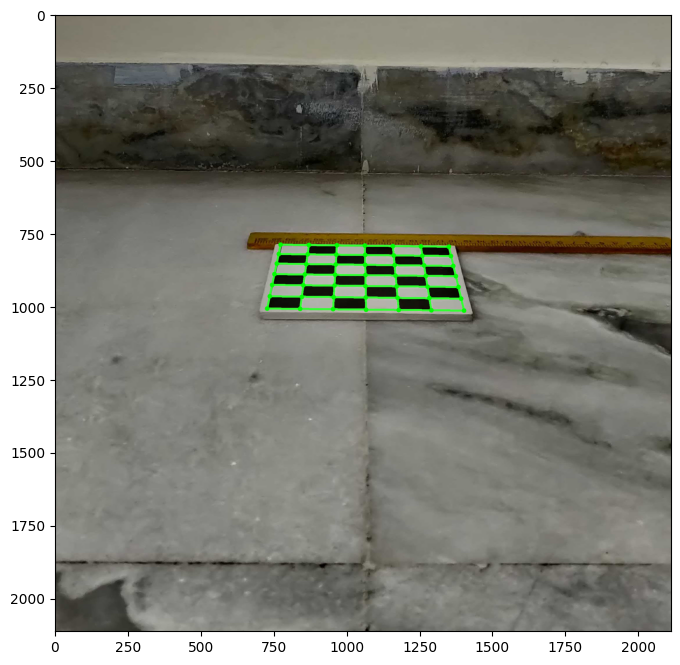

In [23]:
grid_size = 7 
new_world_origin_coordinates = np.zeros((7*7, 3), np.float32)
for i in range(0, grid_size ):
    for j in range(0, grid_size ):
        new_world_origin_coordinates[(i ) * grid_size + (j)] = [i*2, j*2, 0]
        
# print(new_world_coordinates)
new_origin_line_indices = [(0,42),(1,43),(2,44),(3,45),(4,46),(5,47),(6,48),(0, 6), (7, 13), (14, 20), (21, 27), (28, 34),(35,41),(42,48)]
new_origin_wireframes_pixel_coordinates = get_pixel_coordinates(new_projection_matrix, new_world_origin_coordinates)
visualize_image(img_new_name, new_origin_wireframes_pixel_coordinates, new_origin_line_indices)

### Q. Does this result agree with your observations?
##### Yes, the result agrees with my  observations

The observation was that the wireframe overlay showed minimal distortions and aligned well with the chessboard in the image. 

By applying from the computed projection matrix to the world origin coordinates (0, 0, 0) we can obtain the image of the world origin.This transformation maps the world origin to its corresponding point on the image plane.

When determining the image of the world origin using the calibration matrix, the result aligned with the expectations based on the observations. This alignment confirms that the calibration matrix accurately represents the transformation from 3D world coordinates to 2D image coordinates, consistent with the observed alignment of the wireframe overlay with the actual chessboard in the image. Therefore, the result agrees with the observations made during the calibration process.


# Q3. Moving the Chessboard
### 1. Imagine that the chessboard in assign1.jpg was moved by 10 cm to the right (along the ruler). Overlay a wireframe (4 points) of the virtual chessboard on the image at the appropriate location. 

In [24]:

new_moved_world_origin_coordinates = np.array([[0,10,0],[12,10,0],[0,22,0],[12,22,0]])
new_moved_line_indices = [(0, 2), (2, 3), (3, 1), (1, 0)]
new_moved_wireframes_pixel_coordinates = get_pixel_coordinates(new_projection_matrix, new_moved_world_origin_coordinates)

print(new_moved_wireframes_pixel_coordinates)

[[1254.76906465  793.23115335]
 [1290.37576115 1012.45560256]
 [1825.68055427  800.41909707]
 [1957.30877867 1019.36113487]]


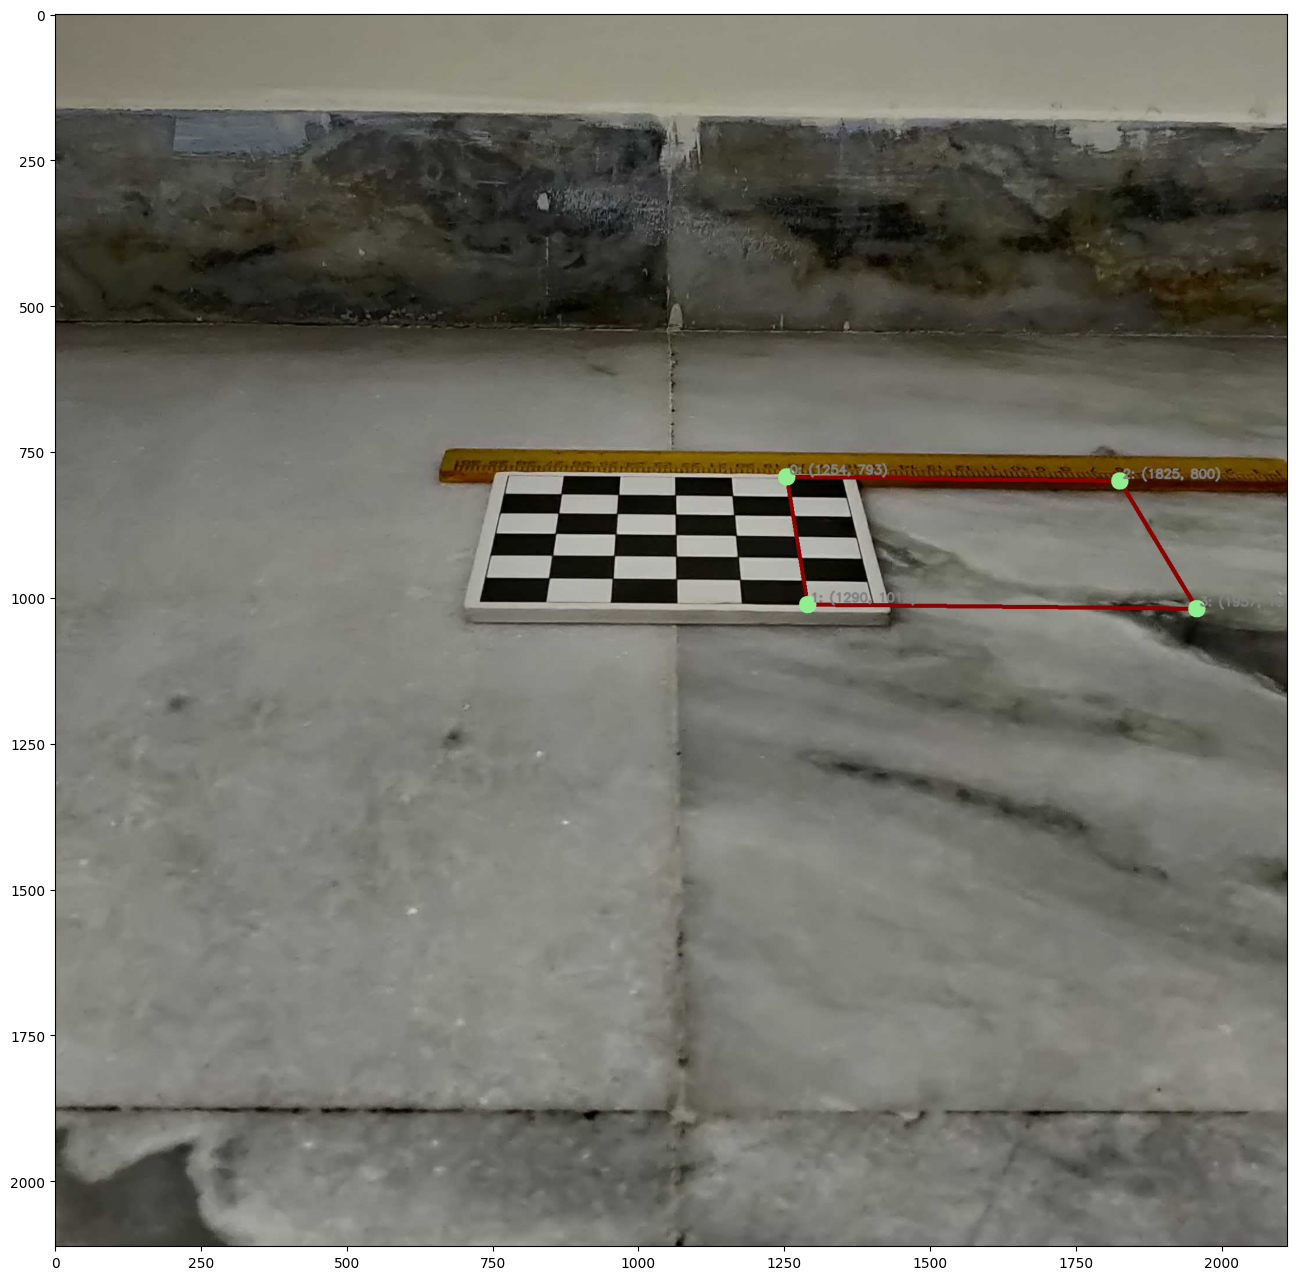

In [25]:
visualize_wireframe(img_new_name, new_moved_wireframes_pixel_coordinates, new_moved_line_indices, circle_color=(144, 238, 144), text_color=(128, 128, 128), line_color=(0, 0, 139))

### Q. -> Does the wireframe look consistent with what you expect?
##### Yes, the wireframe looks consistent with what I expect, mostly.

Given that the chessboard was moved by 10 cm to the right along the ruler, I would expect the wireframe overlay to reflect this movement by appearing shifted to the right in the image. Since the wireframe was correctly adjusted to accommodate this shift, it appears consistent with what I anticipated.



### 2.  Now, think of how you would move the actual pixels or pattern of the chessboard? Overlay the chessboard pattern within the predicted wireframe. Is the overlay consistent with what you expect?

In [26]:
print("Wireframe Coordinates Before Moving World Origin:")
for idx, point in enumerate(new_wireframes_pixel_coordinates):
    print(f"Point {idx}: ({point[0]}, {point[1]})")

print("\nWireframe Coordinates After Moving World Origin:")
for idx, point in enumerate(new_moved_wireframes_pixel_coordinates):
    print(f"Point {idx}: ({point[0]}, {point[1]})")


Wireframe Coordinates Before Moving World Origin:
Point 0: (773.8666053839719, 787.1764498218715)
Point 1: (727.56454418408, 1006.628164202249)
Point 2: (1350.3857739931298, 794.4349958686057)
Point 3: (1402.1663078179504, 1013.6130999530943)

Wireframe Coordinates After Moving World Origin:
Point 0: (1254.769064650158, 793.231153350624)
Point 1: (1290.375761154311, 1012.455602555235)
Point 2: (1825.6805542738462, 800.4190970681597)
Point 3: (1957.3087786723138, 1019.3611348686798)


In [27]:

def show_images_side_by_side(original_image, new_image):
    
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(new_image, cv.COLOR_BGR2RGB))
    plt.title("Image with Adjusted Pixel Values")
    plt.axis('off')
    plt.show()

def visualize_wireframe2(image_path, pixel_coordinates, line_indices, circle_radius=15, circle_color=(0, 255, 0), text_color=(100, 20, 255), line_color=(50, 255, 50), line_thickness=5):
    image = image_path
    plt.figure(figsize=(16, 16)) 
    
    for start_idx, end_idx in line_indices:
        start_point = tuple(map(int, pixel_coordinates[start_idx]))
        end_point = tuple(map(int, pixel_coordinates[end_idx]))
        cv.line(image, start_point, end_point, line_color, line_thickness)  
    
    for idx, point in enumerate(pixel_coordinates):
        x, y = map(int, point)
        cv.circle(image, (x, y), circle_radius, circle_color, -1)  
        cv.putText(image, f'{idx}: ({x}, {y})', (x + 5, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.7, text_color, 2, cv.LINE_AA)
 
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show()


In [28]:

def move_chessboard(original_image, original_coordinates, new_coordinates):
    # Convert coordinates to integers
    original_coordinates = [(int(x), int(y)) for x, y in original_coordinates]
    new_coordinates = [(int(x), int(y)) for x, y in new_coordinates]
    
    # Create a new image with the same dimensions as the original image
    new_image = np.copy(original_image)
    
    # Extract the region of interest (ROI) from the original image using original coordinates
    x_min_original = min(original_coordinates[0][0], original_coordinates[2][0])
    x_max_original = max(original_coordinates[2][0], original_coordinates[3][0])
    y_min_original = min(original_coordinates[0][1], original_coordinates[2][1])
    y_max_original = max(original_coordinates[1][1], original_coordinates[3][1])
#     print()
    
    # Extract the dimensions of the chessboard ROI
    roi_width = x_max_original - x_min_original
    roi_height = y_max_original - y_min_original
    
    # Calculate the new position of the top-left corner of the ROI
    new_x_min = new_coordinates[0][0]
    new_y_min = new_coordinates[0][1]
    
    # Calculate the new position of the bottom-right corner of the ROI
    new_x_max = new_x_min + roi_width
    new_y_max = new_y_min + roi_height
    
    # Paste the ROI onto the new image at the new positions
    new_image[new_y_min:new_y_max, new_x_min:new_x_max] = original_image[y_min_original:y_max_original, x_min_original:x_max_original]
    
    return new_image


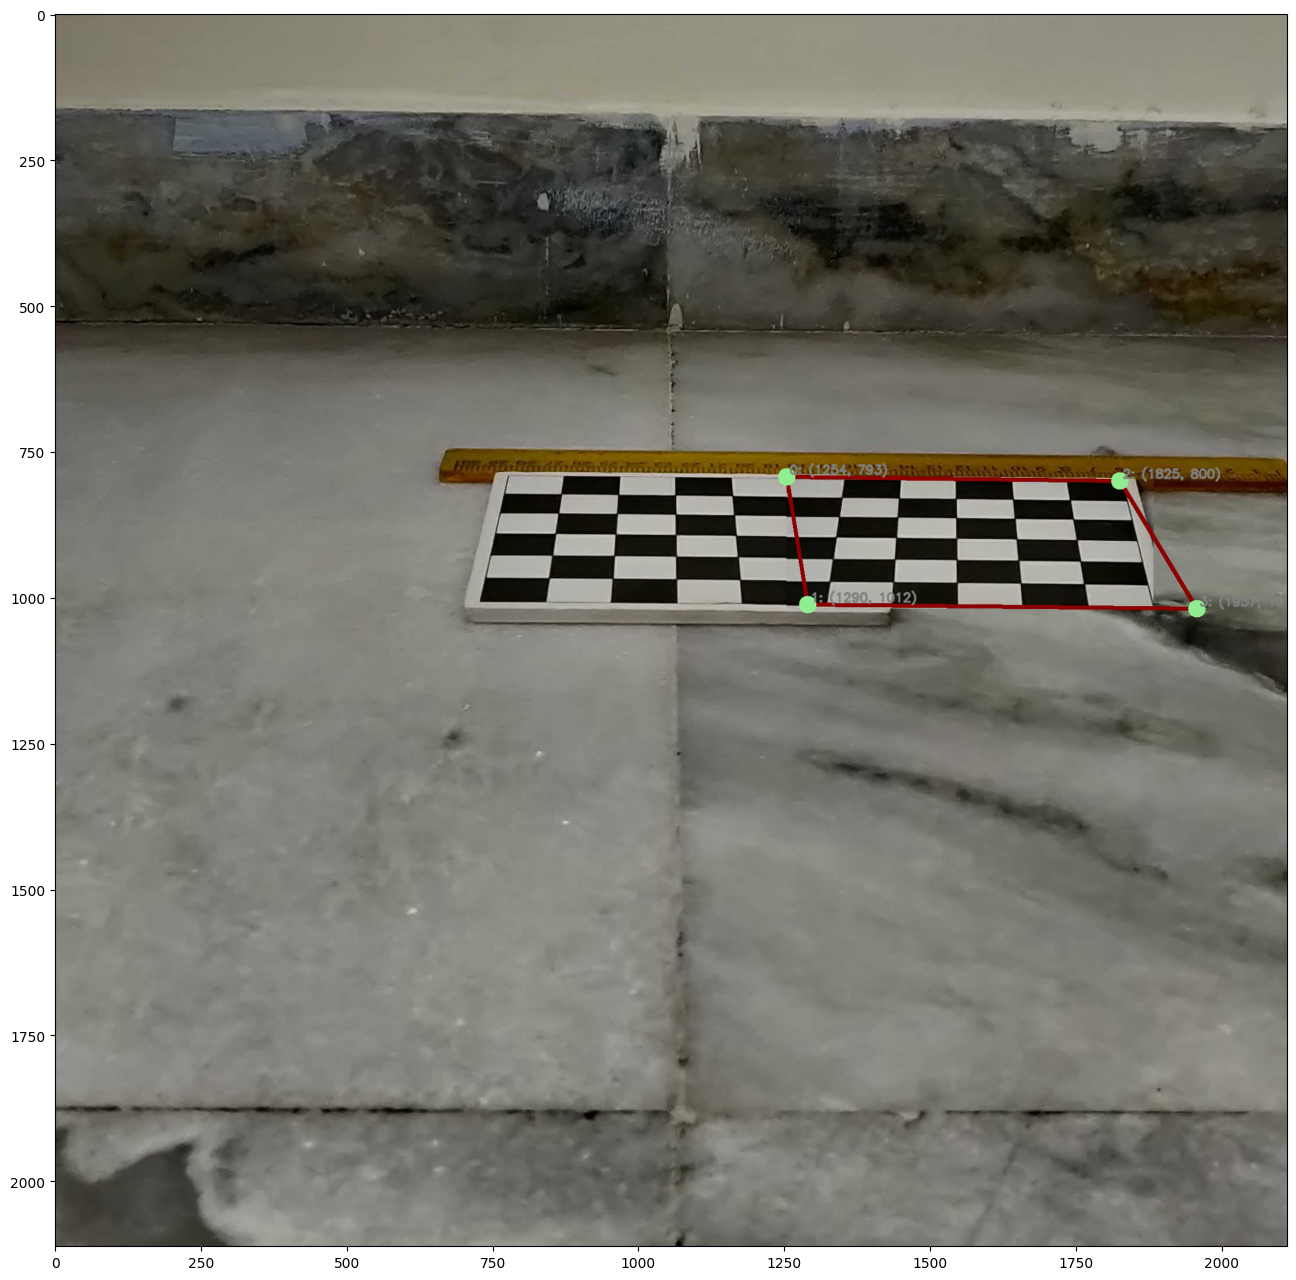

In [29]:

original_image = cv.imread("assign1.jpg")
new_image = move_chessboard(original_image, new_wireframes_pixel_coordinates, new_moved_wireframes_pixel_coordinates)
visualize_wireframe2(new_image, new_moved_wireframes_pixel_coordinates, new_moved_line_indices, circle_color=(144, 238, 144), text_color=(128, 128, 128), line_color=(0, 0, 139))